# Taller 3 Semana 11  
Nombres: 
- Xavier Fuentes
- Víctor Hernández
- Rodrigo Gallardo
- Sebastián Lantadilla
- Iván Rojas

NCR: 2107

Carga de librerías

In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf


In [2]:
# Se utilizará para almacenar el valor del accuracy de todos los modelos para 
# facilitar su comparación más adelante
comparar_modelos = {}

Recibe como parámetro el excel de fraudes

In [3]:
dataset=pd.read_excel("fraudes.xlsx",)

Se revisa la info del dataset, columnas, si viene alguna en nulo, total de registros

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 971 entries, 0 to 970
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      971 non-null    float64
 1   V2      971 non-null    float64
 2   V3      971 non-null    float64
 3   V4      971 non-null    float64
 4   V5      971 non-null    float64
 5   V6      971 non-null    float64
 6   V7      971 non-null    float64
 7   V8      971 non-null    float64
 8   V9      971 non-null    float64
 9   V10     971 non-null    float64
 10  V11     971 non-null    float64
 11  V12     971 non-null    float64
 12  V13     971 non-null    float64
 13  V14     971 non-null    float64
 14  V15     971 non-null    float64
 15  V16     971 non-null    float64
 16  V17     971 non-null    float64
 17  V18     971 non-null    float64
 18  V19     971 non-null    float64
 19  V20     971 non-null    float64
 20  V21     971 non-null    float64
 21  V22     971 non-null    float64
 22  V2

In [5]:
dataset.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Análisis exploratorio

Acá se pasan las columnas a un array de numpy para ser usadas posteriormente

In [6]:
variables = dataset.drop(columns=['Class']).columns.to_numpy()

In [7]:
variables

array(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype=object)

In [8]:
# Usando lambda y map para construir 'var1+var2+var3+...'
var_str = '+'.join(map(lambda x: f'{x}', variables))
str_y_and_x = 'Class ~ ' + var_str
str_y_and_x

'Class ~ V1+V2+V3+V4+V5+V6+V7+V8+V9+V10+V11+V12+V13+V14+V15+V16+V17+V18+V19+V20+V21+V22+V23+V24+V25+V26+V27+V28+Amount'

In [9]:
# Instrucción para generar un modelo de regresión lineal, ajustar y mostrar resultados
modelo = smf.ols(str_y_and_x, dataset)
modelo = modelo.fit()
modelo.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Class   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.655
Method:                 Least Squares   F-statistic:                     64.48
Date:                Wed, 18 Dec 2024   Prob (F-statistic):          6.56e-201
Time:                        22:26:35   Log-Likelihood:                -173.37
No. Observations:                 971   AIC:                             406.7
Df Residuals:                     941   BIC:                             553.1
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2362      0.019     12.498      0.000       0.199       0.273
V1            -0.0113      0.007     -1.703      0.089      -0.024       0.002
V2            -0.0195      0.013     -1.470      0.142      -0.046       0.007
V3            -0.0604      0.008     -7.222      0.000      -0.077      -0.044
V4             0.0444      0.009      5.125      0.000       0.027       0.061
V5             0.0030      0.012      0.255      0.799      -0.020       0.026
V6            -0.0398      0.010     -3.827      0.000      -0.060      -0.019
V7             0.0597      0.014      4.256      0.000       0.032       0.087
V8            -0.0329      0.006     -5.722      0.000      -0.044      -0.022
V9             0.0114      0.011      1.018      0.309      -0.011       0.033
V10           -0.0167      0.010     -1.689      0.091      -0.036       0.003
V11           -0.0224      0.010     -2.301      0.022      -0.041      -0.003
V12            0.0035      0.009      0.373      0.709      -0.015       0.022
V13           -0.0253      0.010     -2.502      0.013      -0.045      -0.005
V14           -0.0347      0.007     -4.668      0.000      -0.049      -0.020
V15           -0.0256      0.011     -2.384      0.017      -0.047      -0.005
V16            0.0185      0.013      1.436      0.151      -0.007       0.044
V17           -0.0373      0.008     -4.690      0.000      -0.053      -0.022
V18            0.0477      0.014      3.324      0.001       0.020       0.076
V19            0.0088      0.011      0.780      0.436      -0.013       0.031
V20           -0.0155      0.017     -0.893      0.372      -0.050       0.019
V21            0.0248      0.008      2.971      0.003       0.008       0.041
V22            0.0757      0.016      4.636      0.000       0.044       0.108
V23           -0.0303      0.015     -1.995      0.046      -0.060      -0.000
V24           -0.0008      0.018     -0.048      0.962      -0.035       0.034
V25           -0.0480      0.019     -2.501      0.013      -0.086      -0.010
V26           -0.0370      0.022     -1.655      0.098      -0.081       0.007
V27            0.0079      0.013      0.600      0.548      -0.018       0.034
V28            0.1259      0.028      4.520      0.000       0.071       0.181
Amount      -3.41e-05      0.000     -0.257      0.797      -0.000       0.000
==============================================================================
Omnibus:                       82.405   Durbin-Watson:                   0.721
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              101.942
Skew:                           0.784   Prob(JB):                     7.30e-23
Kurtosis:                       3.253   Cond. No.                         969.
==============================================================================

N

Antes de realizar cualquier cosa, se procede a analizar un poco los datos

<Axes: title={'center': 'Matriz de correlaciones entre las variables del dataset'}>

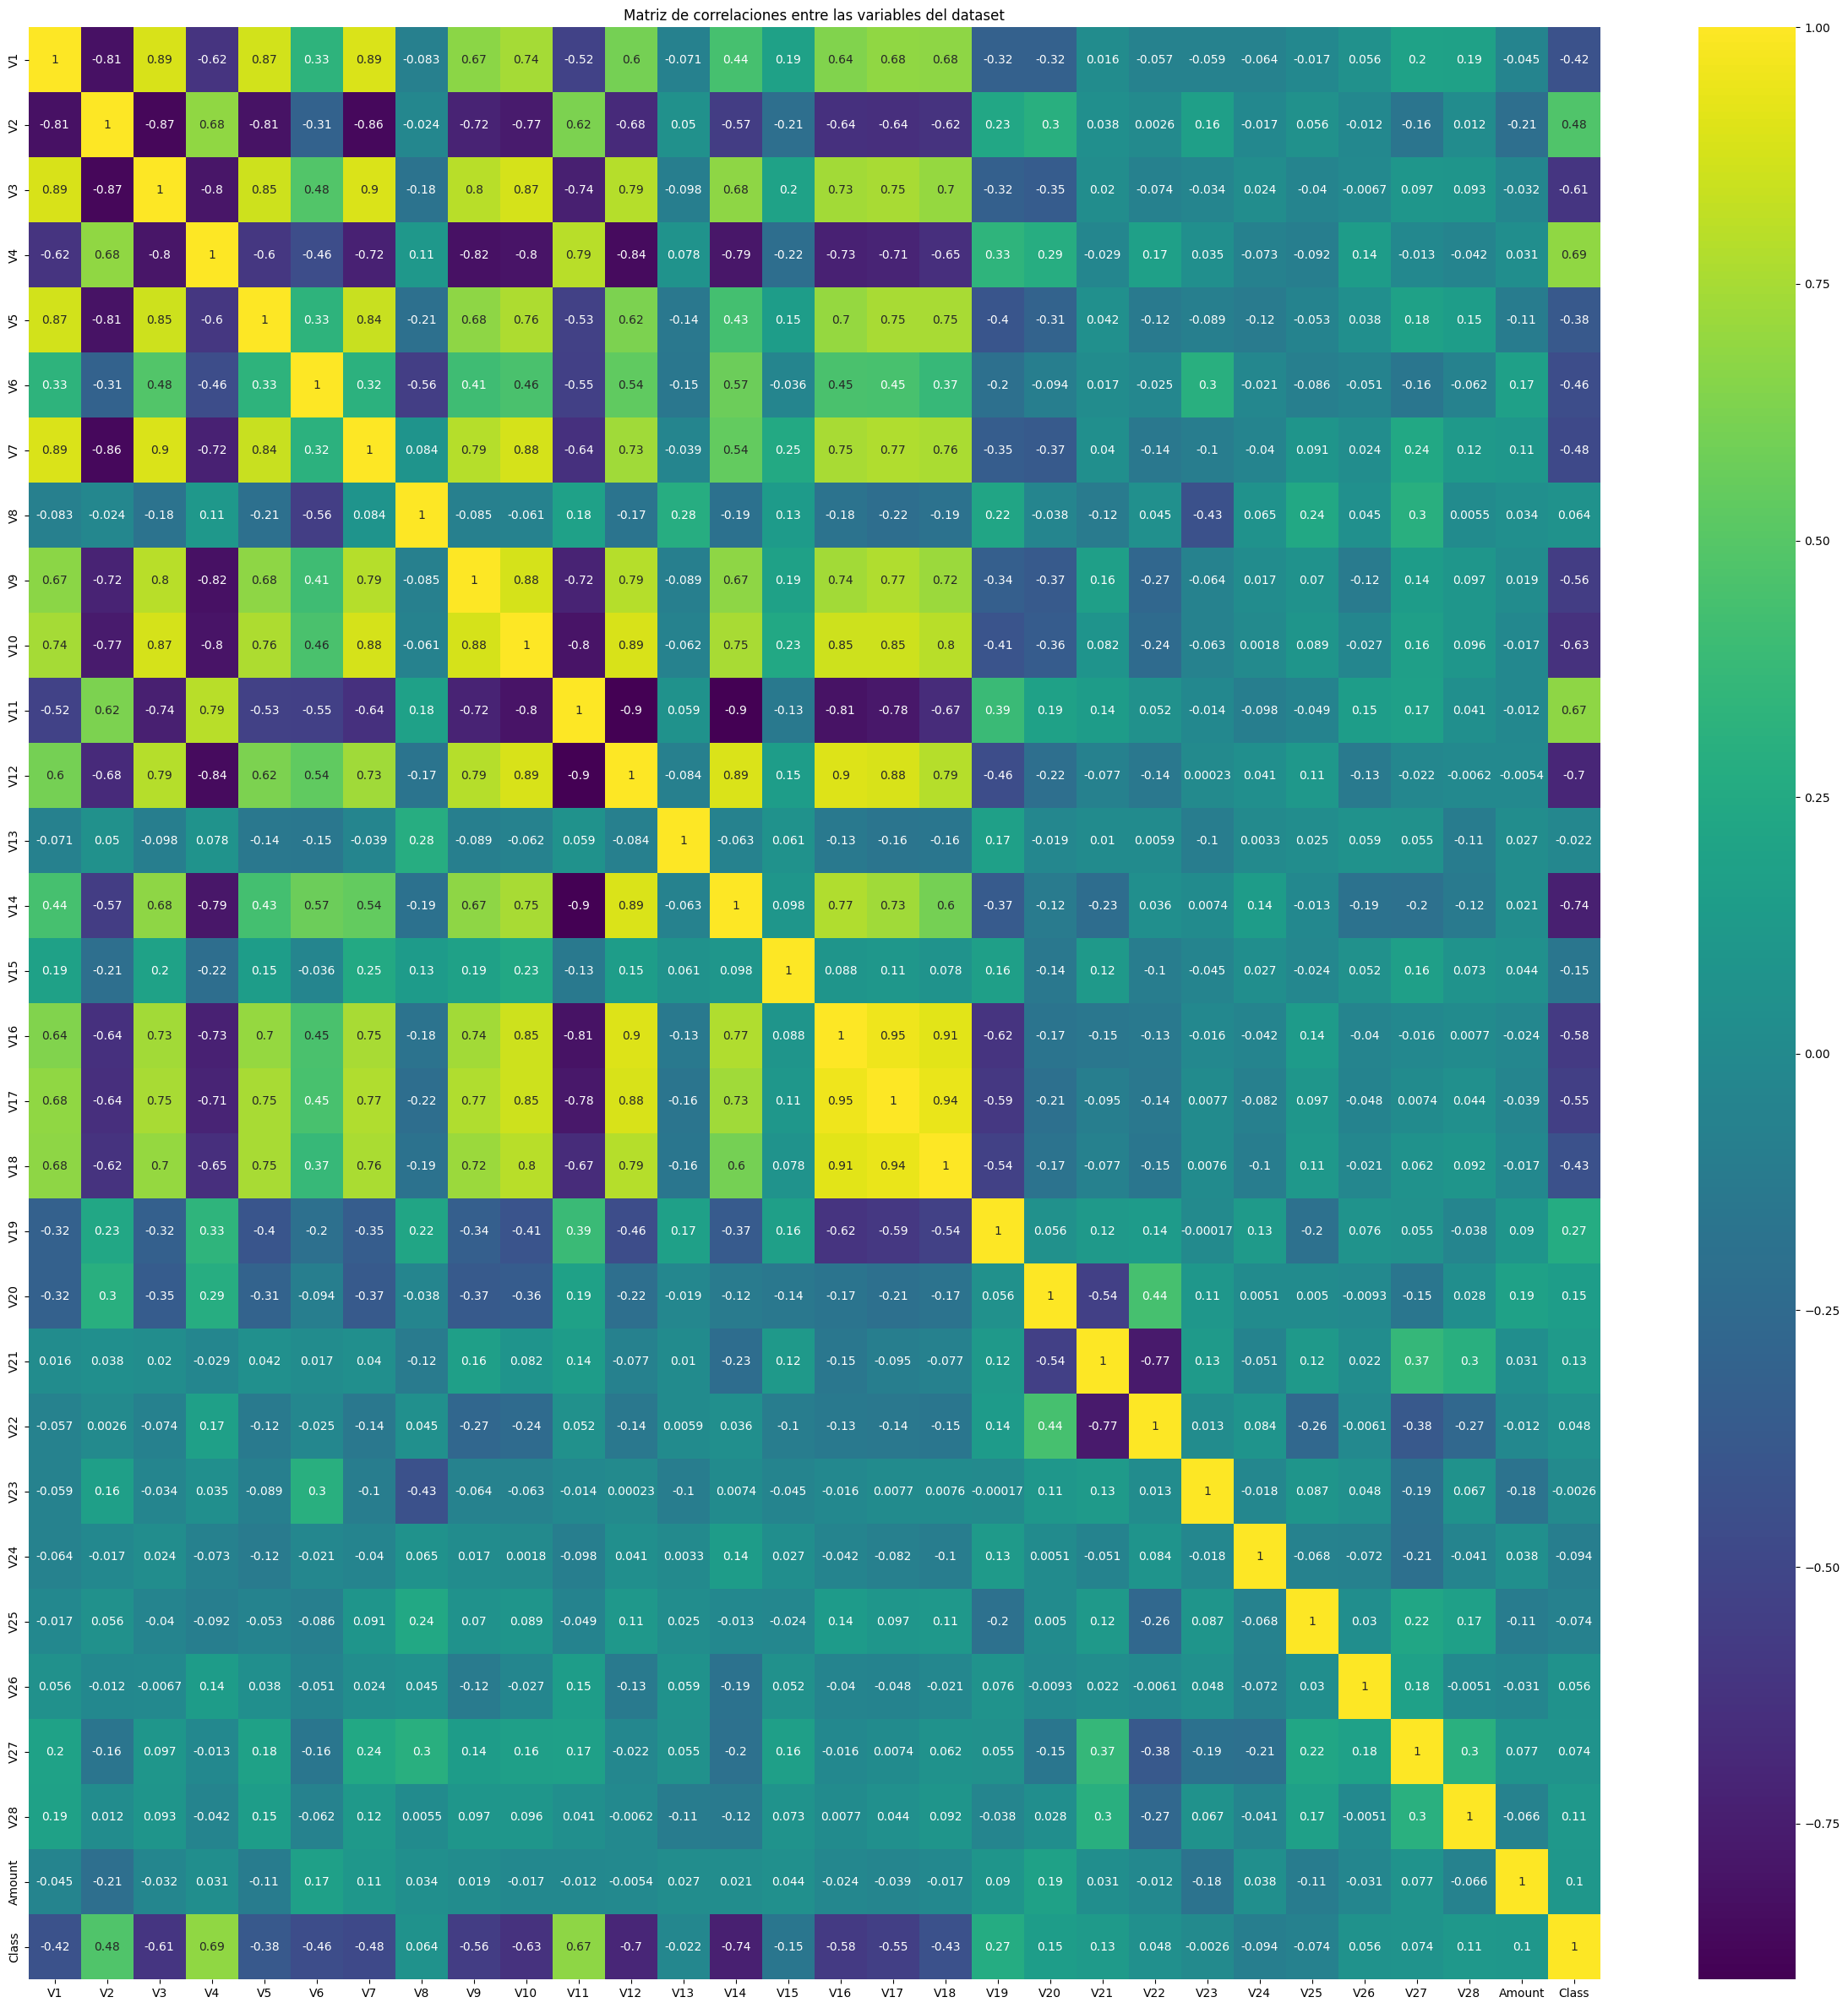

In [10]:
# Método para gráficar una matriz de correlaciones como heatmap
plt.figure(figsize = (30,30))
plt.title('Matriz de correlaciones entre las variables del dataset', fontsize = 12)
sn.heatmap(dataset.corr(), cmap = 'viridis', annot = True)

## Probando modelos con el dataset completo

Acá se separan las variables para ser manejadas de forma separada

In [11]:
# Usando pandas para convertir directamente a un array
y = dataset["Class"].to_numpy().reshape(-1, 1)

In [12]:
# Excluir la columna "Class"
x = dataset.drop(columns=["Class"]).to_numpy()  # Convierte las columnas restantes a un array

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=10)

In [15]:
x_train.shape

(776, 29)

In [16]:
x_test.shape

(195, 29)

## Modelo 1: BernoulliNB

In [17]:
from sklearn.naive_bayes import BernoulliNB

In [18]:
from sklearn.metrics import accuracy_score

In [19]:
modelo1=BernoulliNB()
modelo1.fit(x_train,y_train)

/home/xcx/leng/py/envpy/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BernoulliNB()

In [20]:
ypred=modelo1.predict(x_test)
print("Accuracy: ",accuracy_score(y_test,ypred))
comparar_modelos['BernoulliNB'] = {'Precisión': accuracy_score(y_test,ypred)}

Accuracy:  0.8871794871794871


## Modelo 2: de Árboles de decisión

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [22]:
modelo2 = DecisionTreeClassifier(max_leaf_nodes=4, random_state=0)

In [23]:
modelo2.fit(x_train,y_train)

DecisionTreeClassifier(max_leaf_nodes=4, random_state=0)

[Text(0.5, 0.8333333333333334, 'V3 <= -0.531\ngini = 0.5\nsamples = 776\nvalue = [384, 392]\nclass = Fraude'),
 Text(0.25, 0.5, 'V12 <= -0.209\ngini = 0.101\nsamples = 376\nvalue = [20, 356]\nclass = Fraude'),
 Text(0.375, 0.6666666666666667, 'True  '),
 Text(0.125, 0.16666666666666666, 'gini = 0.028\nsamples = 348\nvalue = [5, 343]\nclass = Fraude'),
 Text(0.375, 0.16666666666666666, 'gini = 0.497\nsamples = 28\nvalue = [15, 13]\nclass = Legal'),
 Text(0.75, 0.5, 'V12 <= -2.029\ngini = 0.164\nsamples = 400\nvalue = [364, 36]\nclass = Legal'),
 Text(0.625, 0.6666666666666667, '  False'),
 Text(0.625, 0.16666666666666666, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]\nclass = Fraude'),
 Text(0.875, 0.16666666666666666, 'gini = 0.141\nsamples = 394\nvalue = [364.0, 30.0]\nclass = Legal')]

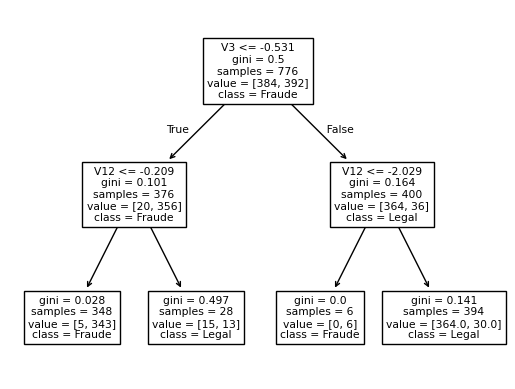

In [24]:
plot_tree(modelo2,feature_names=variables,class_names=["Legal","Fraude"])

In [25]:
ypred2=modelo2.predict(x_test)
print("Accuracy: ",accuracy_score(y_test,ypred2))
comparar_modelos['Arbol'] = {'Precisión': accuracy_score(y_test,ypred2)}

Accuracy:  0.9230769230769231


## Modelo 3: de regresión logística

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [27]:
modelo3=LogisticRegression(max_iter=500) # Para evitar un warning de no límite de convergencia antes de tiempo
y_train_ = y_train.ravel() # El modelo espera un array unidimensional, sin esto arroja un warning
modelo3.fit(x_train,y_train_)

/home/xcx/leng/py/envpy/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=500)

In [28]:
ypred3=modelo3.predict(x_test)
print("Accuracy: ",accuracy_score(y_test,ypred3))
comparar_modelos['RegresionLogistica'] = {'Precisión': accuracy_score(y_test,ypred3)}

Accuracy:  0.958974358974359


## Modelo 4: de Redes neuronales

In [29]:
# para desactivar el uso de tarjetas GPU y que no salga el warning.
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

In [30]:
import tensorflow as tf

2024-12-18 22:26:39.686603: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-18 22:26:39.692402: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-18 22:26:39.707391: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1734571599.741348  404287 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1734571599.749594  404287 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-18 22:26:39.776371: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

In [31]:
from keras.layers import Input, Dense

In [32]:
from keras.models import Sequential
from keras import optimizers

In [33]:
modelo4=Sequential() # Crea un modelo secuencial, lo que significa que las capas se añaden en orden, una tras otra.
modelo4.add(Input(shape=(29,))) # indica que la entrada tiene 29 características (neuronas de entrada). Esto significa que el modelo espera vectores de tamaño 29 como entrada.
modelo4.add(Dense(64, activation='relu')) # Añade una capa oculta completamente conectada (Dense layer) con 64 neuronas
modelo4.add(Dense(32, activation='relu')) # Añade una capa oculta completamente conectada (Dense layer) con 32 neuronas
modelo4.add(Dense(1,activation="sigmoid")) # 1 neurona de salida, función sigmoid, que convierte la salida en un valor entre 0 y 1, osea una clasificación binaria.
modelo4.summary()

2024-12-18 22:26:42.117808: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,033 (15.75 KB)

 Trainable params: 4,033 (15.75 KB)

 Non-trainable params: 0 (0.00 B)

Prepara modelo para ser entrenado

In [34]:
modelo4.compile(optimizer="Adam",loss="binary_crossentropy",metrics=["accuracy"])

Entrena el modelo

Con una época de 1400, demora aproximadamente 2 minutos y 56 segundos

In [35]:
print('Entrenando modelo...')
historial = modelo4.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=1550, verbose=False)
print('Modelo entrenado.')

Entrenando modelo...
Modelo entrenado.


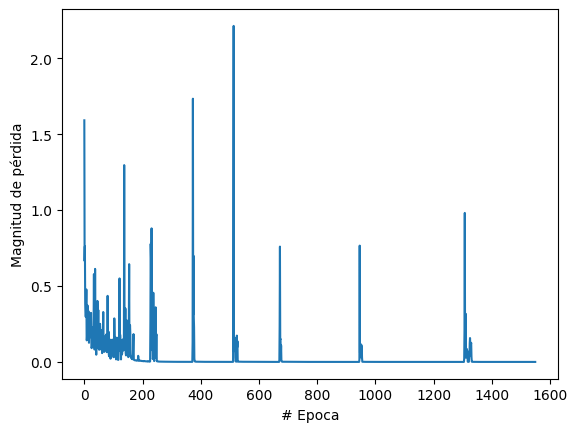

In [36]:
import matplotlib.pyplot as plt
plt.xlabel('# Epoca')
plt.ylabel('Magnitud de pérdida')
plt.plot(historial.history['loss'])

In [37]:
ypred4=modelo4.predict(x_test)
ypred4=ypred4[:]>=0.5

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


In [38]:
print("Accuracy: ",accuracy_score(y_test,ypred4))
comparar_modelos['RedNeuronal'] = {'Precisión': accuracy_score(y_test,ypred4)}

Accuracy:  0.9230769230769231


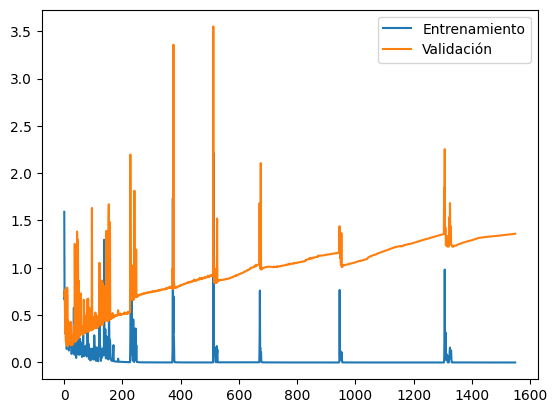

In [39]:
plt.plot(historial.history['loss'], label='Entrenamiento')
plt.plot(historial.history['val_loss'], label='Validación')
plt.legend()


In [ ]:
print(algo)

## Eliminación de variables altamente correlacionadas

Se eliminarán las variables altamente correlacionadas y se probará un modelo para verificar rendimiento, para ello se tomarán los siguientes criterios:

- Variables con correlación ≥ |0.8| entre sí son candidatas a eliminar, ya que aportan información redundante.
- De las dos variables correlacionadas, podemos conservar la que tenga mayor correlación con la variable Class.

Pero antes, se analizará el VIF para revisar cuales son mejores candidatas para la eliminación

In [41]:
# Calcular VIF (Variance Inflation Factor)
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Seleccionar las columnas numéricas del dataset (excluyendo la variable objetivo 'Class')
X = dataset.drop(columns=['Class'])

# Calcular el VIF para cada variable
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Mostrar el VIF
print(vif)


   Variable        VIF
0        V1  17.367079
1        V2  22.189710
2        V3  27.964176
3        V4  12.997330
4        V5  23.785260
5        V6   4.023152
6        V7  72.722957
7        V8   7.105772
8        V9   9.478449
9       V10  31.643251
10      V11  12.114401
11      V12  29.714580
12      V13   1.180063
13      V14  20.313776
14      V15   1.282589
15      V16  30.969418
16      V17  33.745612
17      V18  16.489204
18      V19   2.543593
19      V20   3.516296
20      V21   5.926679
21      V22   3.966037
22      V23   2.938090
23      V24   1.197546
24      V25   1.577565
25      V26   1.242819
26      V27   1.980011
27      V28   1.662998
28   Amount   8.494630


Los resultados muestran que varias variables tienen VIF > 10, lo que indica multicolinealidad y redundancia.

Podemos comenzar eliminando las variables con VIF > 30, ya que son las que más contribuyen a la multicolinealidad.  
Lista preliminar de variables a eliminar:

- V7, V3, V10, V12, V16, V17.

In [42]:
# Lista de variables con VIF > 30
#variables_a_eliminar = ['V1', 'V2', 'V5', 'V9', 'V10', 'V17', 'V23', 'V25', 'V26', 'V28']
variables_a_eliminar = ['V1', 'V2', 'V3', 'V4', 'V5', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17', 'V18']

# Eliminar variables del dataset
data_reducido = dataset.drop(columns=variables_a_eliminar)

# Confirmar las columnas restantes
print("Columnas restantes:", data_reducido.columns)


Columnas restantes: Index(['V6', 'V7', 'V8', 'V9', 'V13', 'V15', 'V19', 'V20', 'V21', 'V22', 'V23',
       'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class'],
      dtype='object')


In [43]:
variables_reducidas = data_reducido.drop(columns=['Class']).columns.to_numpy()

# Aplicaremos los mismos modelos para revisar su nivel de desempeño


In [44]:
# Usando pandas para convertir directamente a un array
y_v2 = data_reducido["Class"].to_numpy().reshape(-1, 1)

# Excluir la columna "Class"
x_v2 = data_reducido.drop(columns=["Class"]).to_numpy()  # Convierte las columnas restantes a un array

x_train_v2, x_test_v2, y_train_v2, y_test_v2 = train_test_split(x_v2, y_v2, test_size=0.2, random_state = 10)


## Modelo 1 v2: BernoulliNB

In [45]:
modelo1_v2 = BernoulliNB()
modelo1_v2.fit(x_train_v2,y_train_v2)

/home/xcx/leng/py/envpy/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BernoulliNB()

In [46]:
ypred_v2 = modelo1_v2.predict(x_test_v2)
print("Accuracy: ",accuracy_score(y_test_v2, ypred_v2))
comparar_modelos['BernoulliNB_v2'] = {'Precisión': accuracy_score(y_test_v2,ypred_v2)}

Accuracy:  0.8


## Modelo 2 v2: de árbol de decisión

In [47]:
modelo2_v2 = DecisionTreeClassifier(max_leaf_nodes = 4, random_state = 0)

In [48]:
modelo2_v2.fit(x_train_v2, y_train_v2)

DecisionTreeClassifier(max_leaf_nodes=4, random_state=0)

[Text(0.3333333333333333, 0.875, 'V7 <= -1.457\ngini = 0.5\nsamples = 776\nvalue = [384, 392]\nclass = Fraude'),
 Text(0.16666666666666666, 0.625, 'gini = 0.048\nsamples = 287\nvalue = [7, 280]\nclass = Fraude'),
 Text(0.25, 0.75, 'True  '),
 Text(0.5, 0.625, 'V9 <= -1.091\ngini = 0.353\nsamples = 489\nvalue = [377, 112]\nclass = Legal'),
 Text(0.41666666666666663, 0.75, '  False'),
 Text(0.3333333333333333, 0.375, 'gini = 0.407\nsamples = 81\nvalue = [23, 58]\nclass = Fraude'),
 Text(0.6666666666666666, 0.375, 'Amount <= 235.82\ngini = 0.23\nsamples = 408\nvalue = [354, 54]\nclass = Legal'),
 Text(0.5, 0.125, 'gini = 0.172\nsamples = 369\nvalue = [334, 35]\nclass = Legal'),
 Text(0.8333333333333334, 0.125, 'gini = 0.5\nsamples = 39\nvalue = [20, 19]\nclass = Legal')]

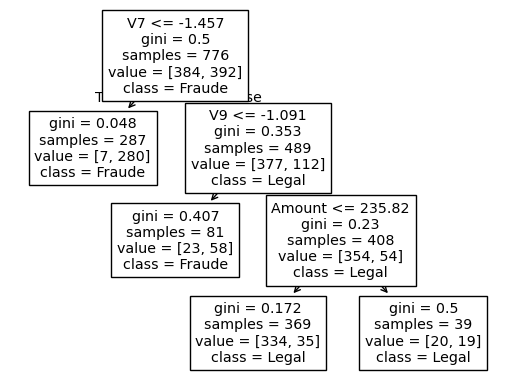

In [49]:
plot_tree(modelo2_v2, feature_names = variables_reducidas, class_names = ["Legal","Fraude"])

In [50]:
ypred2_v2 = modelo2_v2.predict(x_test_v2)

In [51]:
print("Accuracy: ", accuracy_score(y_test_v2, ypred2_v2))
comparar_modelos['Arbol_v2'] = {'Precisión': accuracy_score(y_test_v2,ypred2_v2)}

Accuracy:  0.8


Se observa que la precisión disminuyo al ocupar el conjunto de datos reducido

## Modelo 3 v2: de regresión logística

In [52]:
modelo3_v2 = LogisticRegression()
y_train_v2 = y_train_v2.ravel()
modelo3_v2.fit(x_train_v2, y_train_v2)

/home/xcx/leng/py/envpy/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [53]:
ypred3_v2 = modelo3_v2.predict(x_test_v2)
print("Accuracy: ", accuracy_score(y_test_v2, ypred3_v2))
comparar_modelos['RegresionLogistica_v2'] = {'Precisión': accuracy_score(y_test_v2,ypred3_v2)}

Accuracy:  0.8512820512820513


Se observa que la precisión disminuyo levemente al ocupar el conjunto de datos reducido

## Modelo 4 v2: de redes neuronales

In [54]:
total_menos_y = len(data_reducido.columns) -1

In [55]:
modelo4_v2 = Sequential() # Crea un modelo secuencial, lo que significa que las capas se añaden en orden, una tras otra.
modelo4_v2.add(Input(shape = (total_menos_y,))) # indica que la entrada tiene 29 características (neuronas de entrada). Esto significa que el modelo espera vectores de tamaño 29 como entrada.
modelo4_v2.add(Dense(64, activation = 'relu')) # Añade una capa oculta completamente conectada (Dense layer) con 64 neuronas
modelo4_v2.add(Dense(32, activation = 'relu')) # Añade una capa oculta completamente conectada (Dense layer) con 32 neuronas
modelo4_v2.add(Dense(1, activation = 'sigmoid')) # 1 neurona de salida, función sigmoid, que convierte la salida en un valor entre 0 y 1, osea una clasificación binaria.
modelo4_v2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 64)             │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,265 (12.75 KB)

 Trainable params: 3,265 (12.75 KB)

 Non-trainable params: 0 (0.00 B)

In [56]:
# Prepara el modelo para ser entrenado
modelo4_v2.compile(optimizer="Adam", loss="binary_crossentropy", metrics=["accuracy"])

In [57]:
print('Entrenando modelo...')
historial_v2 = modelo4_v2.fit(x_train_v2, y_train_v2, validation_data=(x_test_v2, y_test_v2), epochs = 1000, verbose = False)
print('Modelo entrenado.')

Entrenando modelo...
Modelo entrenado.


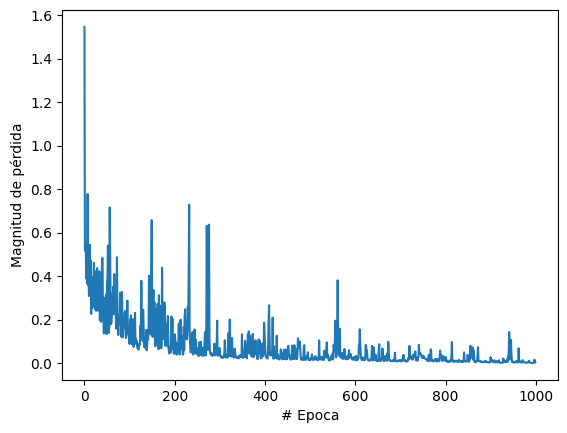

In [58]:
import matplotlib.pyplot as plt
plt.xlabel('# Epoca')
plt.ylabel('Magnitud de pérdida')
plt.plot(historial_v2.history['loss'])

In [59]:
ypred4_v2 = modelo4_v2.predict(x_test_v2)
ypred4_v2 = ypred4_v2[:]>=0.5

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


In [60]:
print("Accuracy: ", accuracy_score(y_test_v2, ypred4_v2))
comparar_modelos['RedNeuronal_v2'] = {'Precisión': accuracy_score(y_test_v2,ypred4_v2)}

Accuracy:  0.9128205128205128


In [61]:
for modelo, metricas in comparar_modelos.items():
    print(f"{modelo:<25}: Precisión = {metricas['Precisión']:.4f}")

BernoulliNB              : Precisión = 0.8872
Arbol                    : Precisión = 0.9231
RegresionLogistica       : Precisión = 0.9590
RedNeuronal              : Precisión = 0.9231
BernoulliNB_v2           : Precisión = 0.8000
Arbol_v2                 : Precisión = 0.8000
RegresionLogistica_v2    : Precisión = 0.8513
RedNeuronal_v2           : Precisión = 0.9128


In [62]:
# Para frenar la ejecución del archivo a disco y todo eso
print(algo)

NameError: name 'algo' is not defined

Guarda el modelo entrenado a disco

In [36]:
modelo4.save("modelo_neuronal.keras")

Carga el modelo entrenado del disco y lo deja en modelo 5

In [37]:
modelo5 = tf.keras.models.load_model('modelo_neuronal.keras')

In [ ]:
modelo5.summary()

In [ ]:
ypred5=modelo5.predict(x_test)
ypred5=ypred5[:]>=0.5

In [ ]:
print("Accuracy: ",accuracy_score(y_test,ypred5))

Lo siguiente es para aplicar el modelo a cada fila del dataset

In [66]:
# Función para aplicar el modelo a una fila de un dataframe de pandas
def aplicar_modelo(fila):
    # Convertir la fila en un array (necesario si el modelo espera arrays de entrada)
    input_data = np.array(fila).reshape(1, -1)  # Reshape para asegurar que tiene la forma correcta
    resultado = modelo4.predict(input_data)  # Aplica el modelo
    #return resultado[0][0]  # Suponiendo que devuelve un array con un resultado
    return int(resultado[0][0] >= 0.5)  # Devuelve 0 o 1 según el umbral


In [67]:
# Lo siguiente es para simular tener un csv sin la columna Class
df_reducido = dataset.drop(columns=['Class'])

In [68]:
# Aplica el modelo a cada fila y crea una nueva columna con los resultados
df_reducido['resultado'] = df_reducido.apply(lambda fila: aplicar_modelo(fila), axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━

In [69]:
df_reducido.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,resultado
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Se guarda el csv a disco

In [70]:
df_reducido.to_csv('resultados.csv', sep=';', index=False)